In [65]:
%%capture captured
# compute polygenic score for Height and 3 hair colors (blonde, black, brow)
!./PRSice_linux \
        --base ukb_gwas/UKB_NEALELAB_2018_HEIGHT.GRCh37.hm3.gz \
        --a1 EffectAllele --a2 OtherAllele --beta --stat B --bp POS --chr CHR --pvalue P --snp RSID \
        --target imputed/opensnp_hm3 \
        --ld imputed/opensnp_hm3 \
        --out pgs/height_cm \
        --thread 6 \
        --bar-levels 5e-8,1e-6,1e-5,1e-4,1e-3,1e-2,0.05,0.1,0.5,1.0 --fastscore --no-full --all-score \
        --binary-target F --pheno qc/pheno.csv --ignore-fid --pheno-col "height_cm" \
        --cov qc/pheno.csv --cov-col "sex,batch,@PC[1-10]"  --cov-factor "sex,batch"

In [60]:
%%capture captured
!./PRSice_linux \
        --base ukb_gwas/UKB_NEALELAB_2018_HAIR_BLONDE.GRCh37.hm3.gz \
        --a1 EffectAllele --a2 OtherAllele --beta --stat B --bp POS --chr CHR --pvalue P --snp RSID \
        --target imputed/opensnp_hm3 \
        --ld imputed/opensnp_hm3 \
        --out pgs/hair_blonde \
        --thread 6 \
        --bar-levels 5e-8,1e-6,1e-5,1e-4,1e-3,1e-2,0.05,0.1,0.5,1.0 --fastscore --no-full --all-score \
        --binary-target T --pheno qc/pheno.csv --ignore-fid --pheno-col "hair_blonde" \
        --cov qc/pheno.csv --cov-col "sex,batch,@PC[1-10]"  --cov-factor "sex,batch"


In [61]:
%%capture captured
!./PRSice_linux \
        --base ukb_gwas/UKB_NEALELAB_2018_HAIR_BLACK.GRCh37.hm3.gz \
        --a1 EffectAllele --a2 OtherAllele --beta --stat B --bp POS --chr CHR --pvalue P --snp RSID \
        --target imputed/opensnp_hm3 \
        --ld imputed/opensnp_hm3 \
        --out pgs/hair_black \
        --thread 6 \
        --bar-levels 5e-8,1e-6,1e-5,1e-4,1e-3,1e-2,0.05,0.1,0.5,1.0 --fastscore --no-full --all-score \
        --binary-target T --pheno qc/pheno.csv --ignore-fid --pheno-col "hair_black" \
        --cov qc/pheno.csv --cov-col "sex,batch,@PC[1-10]"  --cov-factor "sex,batch"


In [62]:
%%capture captured
!./PRSice_linux \
        --base ukb_gwas/UKB_NEALELAB_2018_HAIR_DARK_BROWN.GRCh37.hm3.gz \
        --a1 EffectAllele --a2 OtherAllele --beta --stat B --bp POS --chr CHR --pvalue P --snp RSID \
        --target imputed/opensnp_hm3 \
        --ld imputed/opensnp_hm3 \
        --out pgs/hair_brown \
        --thread 6 \
        --bar-levels 5e-8,1e-6,1e-5,1e-4,1e-3,1e-2,0.05,0.1,0.5,1.0 --fastscore --no-full --all-score \
        --binary-target T --pheno qc/pheno.csv --ignore-fid --pheno-col "hair_brown" \
        --cov qc/pheno.csv --cov-col "sex,batch,@PC[1-10]"  --cov-factor "sex,batch"


In [63]:
# display prevalence of hair colors in each PGS group
import numpy as np

for pheno in ['hair_brown', 'hair_black', 'hair_blonde']:
    df_pgs = pd.read_csv(f'pgs/{pheno}.best', delim_whitespace=True)
    df_pheno = pd.read_csv('qc/pheno.csv', sep='\t')
    df_pgs = pd.merge(df_pgs[['IID', 'PRS']], df_pheno[['IID', pheno]]).dropna()

    low20 = np.quantile(df_pgs['PRS'], 0.2)
    high80 = np.quantile(df_pgs['PRS'], 0.8)
    low_prev = df_pgs[df_pgs['PRS'] < low20][pheno].values.mean()
    med_prev = df_pgs[(df_pgs['PRS'] >= low20) & (df_pgs['PRS'] <= high80)][pheno].values.mean()
    high_prev = df_pgs[df_pgs['PRS'] > high80][pheno].values.mean()
    print(f'{pheno} prevalence per quintile: 1st - {low_prev:.2f}; 2nd-4th - {med_prev:.2f}; 5th - {high_prev:.2f}')


hair_brown prevalence per quintile: 1st - 0.40; 2nd-4th - 0.66; 5th - 0.78
hair_black prevalence per quintile: 1st - 0.01; 2nd-4th - 0.02; 5th - 0.13
hair_blonde prevalence per quintile: 1st - 0.09; 2nd-4th - 0.30; 5th - 0.50


PGS and height_cm correlation:  0.3857082268376786


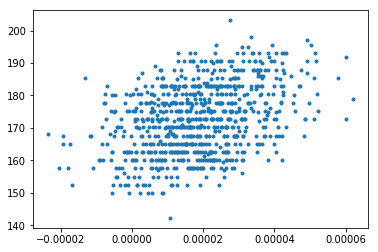

In [66]:
# plot height vs pgs(height)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pheno = 'height_cm'
df_pgs = pd.read_csv(f'pgs/{pheno}.best', delim_whitespace=True)
df_pheno = pd.read_csv('qc/pheno.csv', sep='\t')
df_pgs = pd.merge(df_pgs[['IID', 'PRS']], df_pheno[['IID', pheno]]).dropna()

#df_plot[c] = (df_plot[c] - np.mean(df_plot[c].values) ) / np.std(df_plot[c].values)
plt.plot(df_pgs['PRS'].values, df_pgs[pheno], '.')
print(f'PGS and {pheno} correlation: ', np.corrcoef(df_pgs['PRS'].values, df_pgs[pheno].values)[0][1])